#Eclipsing binary: generate the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import starry

import theano
theano.config.gcc__cxxflags += " -fexceptions"

np.random.seed(12)
starry.config.lazy = False
starry.config.quiet = True

In [ ]:
# Primary star
map = starry.Map(ydeg=5)
map.add_spot(amp=-0.075, sigma=0.1, lat=0, lon=-30)
A_y = np.array(map.y[1:])

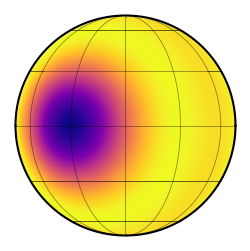

In [3]:
map.show()

In [4]:
#Secondary star
map.reset()
map.add_spot(amp=-0.075, sigma=0.1, lat=-30, lon=60)
B_y = np.array(map.y[1:])

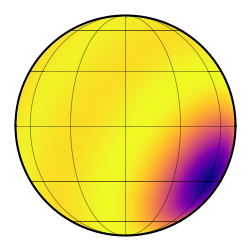

In [5]:
map.show()

Now let’s define and store all of the parameters of the system. The primary is a sun-like star. The secondary is a smaller star (say, a K dwarf) on a very short period orbit. To make things interesting, the rotation periods of the primary and secondary are resonant with the orbital period at 5:4 and 5:8, respectively. The equators of both stars are coplanar with the orbit, but the entire system is viewed at an inclination of 80∘. Since the orbital period is so short, both the primary and secondary eclipses are somewhat grazing.

In [7]:
A = dict(
    ydeg=5,  # degree of the map
    udeg=2,  # degree of the limb darkening
    inc=80.0,  # inclination in degrees
    amp=1.0,  # amplitude (a value prop. to luminosity)
    r=1.0,  #  radius in R_sun
    m=1.0,  # mass in M_sun
    prot=1.25,  # rotational period in days
    u=[0.40, 0.25],  # limb darkening coefficients
    y=A_y,  # the spherical harmonic coefficients
)

B = dict(
    ydeg=5,  # degree of the map
    udeg=2,  # degree of the limb darkening
    inc=80.0,  # inclination in degrees
    amp=0.1,  # amplitude (a value prop. to luminosity)
    r=0.7,  #  radius in R_sun
    m=0.7,  #  mass in M_sun
    porb=1.00,  # orbital period in days
    prot=0.625,  # rotational period in days
    t0=0.15,  # reference time in days (when it transits A)
    u=[0.20, 0.05],  # limb darkening coefficients
    y=B_y,  # the spherical harmonic coefficients
)

In [8]:
#Initialize the keplerian system

pri = starry.Primary(
    starry.Map(ydeg=A["ydeg"], udeg=A["udeg"], inc=A["inc"], amp=A["amp"]),
    r=A["r"],
    m=A["m"],
    prot=A["prot"],
)
pri.map[1:] = A["u"]
pri.map[1:, :] = A["y"]
pri.map.show(theta=np.linspace(0, 360, 50))

In [9]:
sec = starry.Secondary(
    starry.Map(ydeg=B["ydeg"], udeg=B["udeg"], inc=B["inc"], amp=B["amp"]),
    r=B["r"],
    m=B["m"],
    porb=B["porb"],
    prot=B["prot"],
    t0=B["t0"],
    inc=B["inc"],
)
sec.map[1:] = B["u"]
sec.map[1:, :] = B["y"]
sec.map.show(theta=np.linspace(0, 360, 50))

In [10]:
sys = starry.System(pri, sec)
sys.show(t=np.linspace(-2.5, 2.5, 300), window_pad=4.75, figsize=(5, 5))

In [11]:
t = np.linspace(-2.5, 2.5, 1000)
flux_true = sys.flux(t)
sigma = 0.0005
flux = flux_true + sigma * np.random.randn(len(t))

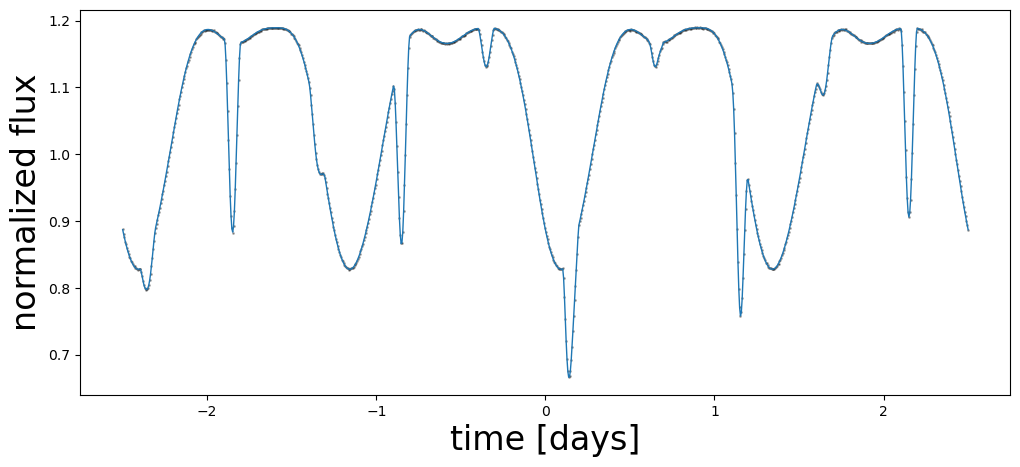

In [17]:
fig, ax = plt.subplots(1, figsize=(12, 5))
ax.plot(t, flux, "k.", alpha=0.3, ms=2)
ax.plot(t, flux_true, lw=1)
ax.set_xlabel("time [days]", fontsize=24)
ax.set_ylabel("normalized flux", fontsize=24);

In [13]:
np.savez("eb.npz", A=A, B=B, t=t, flux=flux, sigma=sigma)